In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



/var/folders/x1/tzn5_xnj79j6mrgx5h3grhw00000gn/T/ipykernel_75847/3535552890.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [17]:
#Import data and show forst 5 rows
df = pd.read_csv("/Users/ahmadcheema/5300 Project Stuff/Data Gathering and Cleaning/final_project.csv")
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,a_team,h_goals,a_goals,lastAction,Year,league,shot_distance,angle_to_goal,total_goals,half
0,310360.0,2.0,No Goal,0.783,0.543,0.032753,Thiago Alcántara,h,229.0,OpenPlay,...,Hertha Berlin,2.0,2.0,Pass,2019-2020,germany,33.472416,0.135517,4.0,1
1,310361.0,6.0,No Goal,0.815,0.431,0.058445,Thomas Müller,h,224.0,OpenPlay,...,Hertha Berlin,2.0,2.0,Pass,2019-2020,germany,33.448862,0.107570,4.0,1
2,310364.0,16.0,No Goal,0.937,0.394,0.019293,Thomas Müller,h,224.0,SetPiece,...,Hertha Berlin,2.0,2.0,Aerial,2019-2020,germany,33.365405,0.098337,4.0,1
3,310365.0,23.0,Goal,0.936,0.505,0.593661,Robert Lewandowski,h,227.0,OpenPlay,...,Hertha Berlin,2.0,2.0,Pass,2019-2020,germany,33.367733,0.126035,4.0,1
4,310366.0,24.0,No Goal,0.909,0.287,0.051898,Serge Gnabry,h,993.0,OpenPlay,...,Hertha Berlin,2.0,2.0,Pass,2019-2020,germany,33.383240,0.071633,4.0,1


In [18]:
# Print the data types of all columns
print(df.dtypes)

id               float64
minute           float64
result            object
X                float64
Y                float64
xG               float64
player            object
h_a               object
player_id        float64
situation         object
season           float64
shotType          object
h_team            object
a_team            object
h_goals          float64
a_goals          float64
lastAction        object
Year              object
league            object
shot_distance    float64
angle_to_goal    float64
total_goals      float64
half               int64
dtype: object


In [19]:
# dropping columns not needed for analysis
df.drop(columns=['X', 'Y', 'minute', 'player', 'Year', 'h_team', 'a_team', 'h_goals', 'a_goals', 'id'], inplace=True)



In [20]:
# Print the data types of all columns
print(df.dtypes)

result            object
xG               float64
h_a               object
player_id        float64
situation         object
season           float64
shotType          object
lastAction        object
league            object
shot_distance    float64
angle_to_goal    float64
total_goals      float64
half               int64
dtype: object


In [21]:
# Identify categorical columns (
categorical_cols = df.select_dtypes(include=['object']).columns

numeric = ['result', 'xG', 'season', 'shot_distance', 'angle_to_goal', 'total_goals'] 
numeric_df = df[numeric]


# One-Hot Encode each categorical column and concatenate it to the numeric
for col in categorical_cols:
    # Create dummy variables
    dummies = pd.get_dummies(df[col], prefix=col)
    # Concatenate the dummy variables to the main dataframe
    data = pd.concat([numeric_df, dummies], axis=1)

In [22]:
# result is the target variable 
X = data.drop('result', axis=1)
y = data['result']


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


In [23]:
# Split the dataframe into X and y and then split X and y into train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


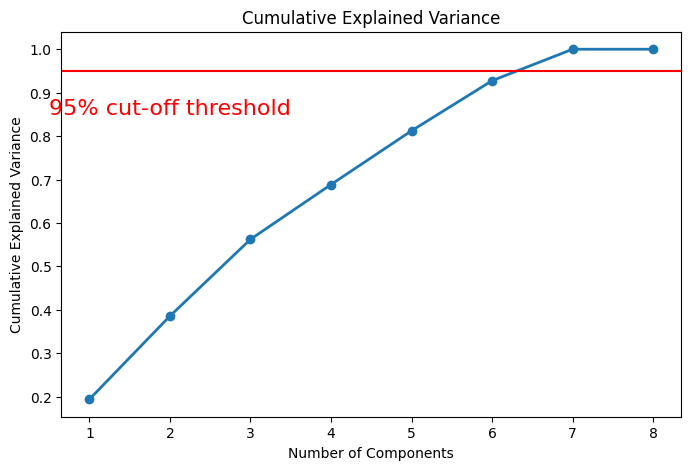

Number of components that explain at least 95% variance: 7


In [151]:

from sklearn.decomposition import PCA

# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

# Performing PCA without reducing dimensionality
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# Cumulative explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# Selecting number of components that explain at least 95% variance
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_95_var = np.where(cum_explained_variance >= 0.95)[0][0] + 1
print(f"Number of components that explain at least 95% variance: {num_components_95_var}")

In [152]:
# Apply PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [157]:
# Import svc from sklearn.svm and classsification_report, confusion_matrix from sklearn.metrics.



svm_classifier = SVC(kernel='poly', degree=2, C=0.55)

# Fit the classifier on the normalized training data
svm_classifier.fit(X_train_pca, y_train)

# Predict on the normalized training data
Y_train_pred_svm = svm_classifier.predict(X_train_pca)

# Predict on the normalized test data
Y_test_pred_svm = svm_classifier.predict(X_test_pca)

In [158]:

# Calculate the confusion matrix and classification report for the training data
train_confusion_matrix_svm = confusion_matrix(y_train, Y_train_pred_svm)
train_classification_report_svm = classification_report(y_train, Y_train_pred_svm, output_dict=True)

# Calculate the confusion matrix and classification report for the test data
test_confusion_matrix_svm = confusion_matrix(y_test, Y_test_pred_svm)
test_classification_report_svm = classification_report(y_test, Y_test_pred_svm, output_dict=True)


report_df_svm = pd.DataFrame(test_classification_report_svm).transpose()


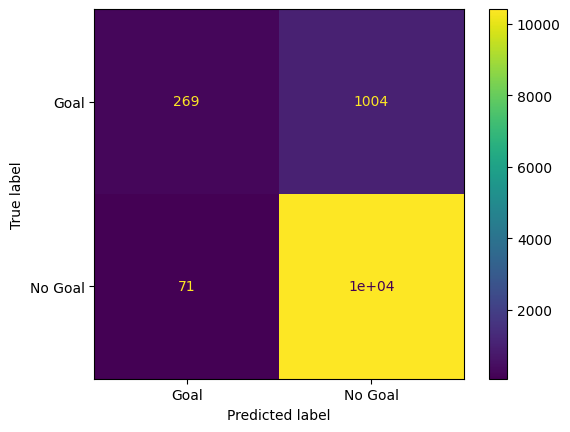

In [159]:
# Display Confusion Matrix for the test data. 

ConfusionMatrixDisplay.from_predictions(y_test, Y_test_pred_svm)
plt.show()

In [160]:
# Import svc from sklearn.svm and classsification_report, confusion_matrix from sklearn.metrics.

svm_classifier2 = SVC(kernel='sigmoid', C=0.55)

# Fit the classifier on the normalized training data
svm_classifier2.fit(X_train_pca, y_train)

# Predict on the normalized training data
Y_train_pred_svm2 = svm_classifier2.predict(X_train_pca)

# Predict on the normalized test data
Y_test_pred_svm2 = svm_classifier2.predict(X_test_pca)

In [161]:


# Calculate the confusion matrix and classification report for the training data
train_confusion_matrix_svm2 = confusion_matrix(y_train, Y_train_pred_svm2)
train_classification_report_svm2 = classification_report(y_train, Y_train_pred_svm2, output_dict=True)

# Calculate the confusion matrix and classification report for the test data
test_confusion_matrix_svm2 = confusion_matrix(y_test, Y_test_pred_svm2)
test_classification_report_svm2 = classification_report(y_test, Y_test_pred_svm2, output_dict=True)

In [162]:
report_df_svm2 = pd.DataFrame(test_classification_report_svm).transpose()

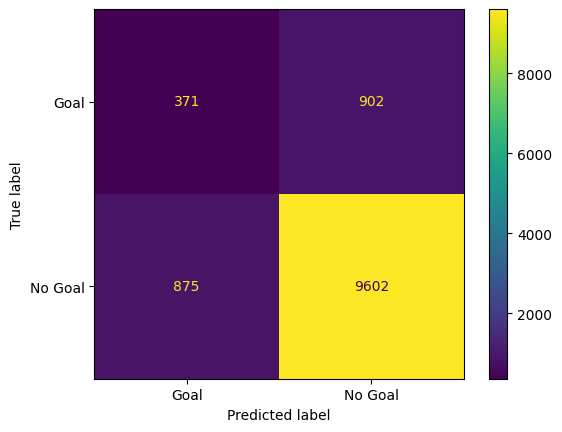

In [163]:
# Display Confusion Matrix for the test data. 

ConfusionMatrixDisplay.from_predictions(y_test, Y_test_pred_svm2)
plt.show()

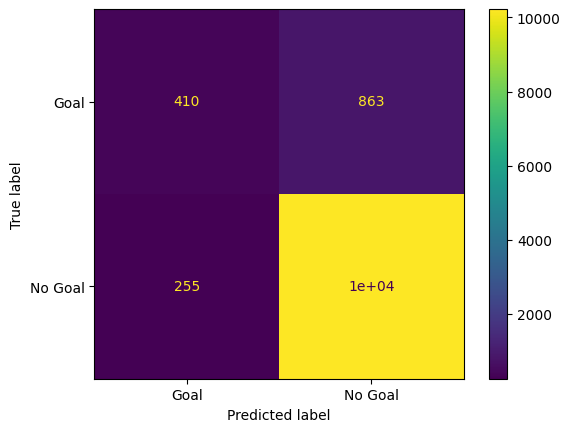

In [164]:

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train_pca, y_train)



# Predict on the normalized training data
Y_train_pred_rf = rf_classifier.predict(X_train_pca)

# Predict on the normalized test data
Y_test_pred_rf = rf_classifier.predict(X_test_pca)

# Calculate the confusion matrix and classification report for the training data
train_confusion_matrix_rf = confusion_matrix(y_train, Y_train_pred_rf)
train_classification_report_rf = classification_report(y_train, Y_train_pred_rf, output_dict=True)

# Calculate the confusion matrix and classification report for the test data
test_confusion_matrix_rf = confusion_matrix(y_test, Y_test_pred_rf)
test_classification_report_rf = classification_report(y_test, Y_test_pred_rf, output_dict=True)

# Save the results in a data frame.
report_df_rf = pd.DataFrame(test_classification_report_rf).transpose()



# Display Confusion Matrix for the test data. 

ConfusionMatrixDisplay.from_predictions(y_test, Y_test_pred_rf)
plt.show()

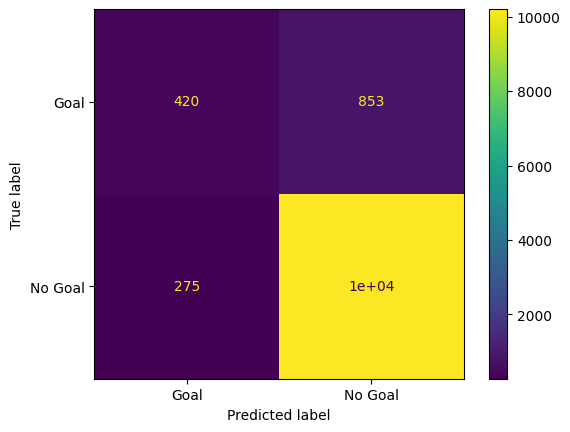

In [165]:
from sklearn.model_selection import cross_val_score

# Create the Gradient Boosting classifier

gb_classifier = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=4, random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train_pca, y_train)


# Predict on the normalized training data
Y_train_pred_gb = gb_classifier.predict(X_train_pca)

# Predict on the normalized test data
Y_test_pred_gb = gb_classifier.predict(X_test_pca)


# Calculate the confusion matrix and classification report for the training data
train_confusion_matrix_gb = confusion_matrix(y_train, Y_train_pred_gb)
train_classification_report_gb = classification_report(y_train, Y_train_pred_gb, output_dict=True)

# Calculate the confusion matrix and classification report for the test data
test_confusion_matrix_gb = confusion_matrix(y_test, Y_test_pred_gb)
test_classification_report_gb = classification_report(y_test, Y_test_pred_gb, output_dict=True)

# Save the results in a data frame.
report_df_gb = pd.DataFrame(test_classification_report_gb).transpose()


# Display Confusion Matrix for the test data. 

ConfusionMatrixDisplay.from_predictions(y_test, Y_test_pred_gb)
plt.show()

In [166]:
# Check if the classifier has a decision_function, otherwise use predict_proba
if hasattr(svm_classifier, "decision_function"):
    y_scores = svm_classifier.decision_function(X_test_pca)
else:
    y_scores = svm_classifier.predict_proba(X_test_pca)[:, 1]  

# Here we specify the positive class label for roc_curve
fpr1, tpr1, threshold1 = roc_curve(y_test, y_scores, pos_label="No Goal")

# Calculate the AUC
roc_auc_svm = auc(fpr1, tpr1)

# Check if the classifier has a decision_function, otherwise use predict_proba
if hasattr(svm_classifier2, "decision_function"):
    y_scores2 = svm_classifier2.decision_function(X_test_pca)
else:
    y_scores2 = svm_classifier2.predict_proba(X_test_pca)[:, 1]  

# Here we specify the positive class label for roc_curve
fpr2, tpr2, threshold2 = roc_curve(y_test, y_scores2, pos_label="No Goal")

# Calculate the AUC
roc_auc2 = auc(fpr2, tpr2)


# Check if the classifier has a decision_function, otherwise use predict_proba
if hasattr(rf_classifier, "decision_function"):
    y_scores3 = rf_classifier.decision_function(X_test_pca)
else:
    y_scores3 = rf_classifier.predict_proba(X_test_pca)[:, 1]  

# Here we specify the positive class label for roc_curve
fpr3, tpr3, threshold3 = roc_curve(y_test, y_scores3, pos_label="No Goal")

# Calculate the AUC
roc_auc3 = auc(fpr3, tpr3)

# Check if the classifier has a decision_function, otherwise use predict_proba
if hasattr(gb_classifier, "decision_function"):
    y_scores4 = gb_classifier.decision_function(X_test_pca)
else:
    y_scores4 = gb_classifier.predict_proba(X_test_pca)[:, 1]  

# Here we specify the positive class label for roc_curve
fpr4, tpr4, threshold4 = roc_curve(y_test, y_scores, pos_label="No Goal")

# Calculate the AUC
roc_auc4 = auc(fpr4, tpr4)




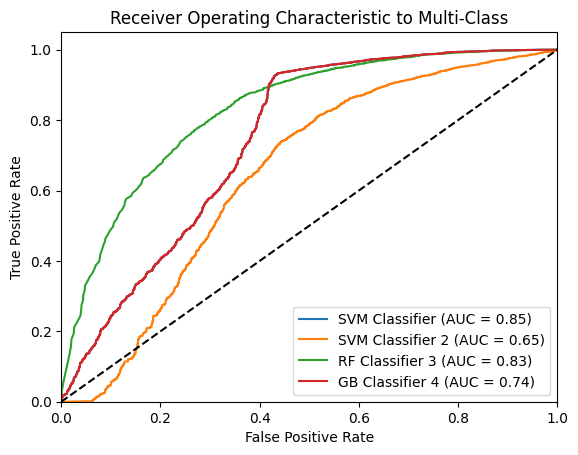

In [167]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr1, tpr1, label=f'SVM Classifier (AUC = {roc_auc:0.2f})')
plt.plot(fpr2, tpr2, label=f'SVM Classifier 2 (AUC = {roc_auc2:0.2f})')
plt.plot(fpr3, tpr3, label=f'RF Classifier 3 (AUC = {roc_auc3:0.2f})')
plt.plot(fpr4, tpr4, label=f'GB Classifier 4 (AUC = {roc_auc4:0.2f})')

# Plot the diagonal 50% chance line
plt.plot([0, 1], [0, 1], 'k--')

# Set the axes ranges and axes labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [172]:
print("Statistics for Polynomial SVM Classification:")
print(report_df_svm)  

print("\nStatistics for Sigmoid SVM Classification:")
print(report_df_svm2)  

print("\nStatistics for Random Forests Classification:")
print(report_df_rf)  

print("\nStatistics for Gradient Boosted Classification:")
print(report_df_gb)  


Statistics for Polynomial SVM Classification:
              precision    recall  f1-score       support
Goal           0.791176  0.211312  0.333540   1273.000000
No Goal        0.912007  0.993223  0.950884  10477.000000
accuracy       0.908511  0.908511  0.908511      0.908511
macro avg      0.851592  0.602268  0.642212  11750.000000
weighted avg   0.898916  0.908511  0.884001  11750.000000

Statistics for Sigmoid SVM Classification:
              precision    recall  f1-score       support
Goal           0.791176  0.211312  0.333540   1273.000000
No Goal        0.912007  0.993223  0.950884  10477.000000
accuracy       0.908511  0.908511  0.908511      0.908511
macro avg      0.851592  0.602268  0.642212  11750.000000
weighted avg   0.898916  0.908511  0.884001  11750.000000

Statistics for Random Forests Classification:
              precision    recall  f1-score       support
Goal           0.616541  0.322074  0.423117   1273.000000
No Goal        0.922147  0.975661  0.948150  10477.

In [175]:
accuracy_svm = accuracy_score(y_test, Y_test_pred_svm)  # Calculate accuracy
print(f'Accuracy of Polynomial SVM: {accuracy_svm:.2f}')

accuracy_svm2 = accuracy_score(y_test, Y_test_pred_svm2)  # Calculate accuracy
print(f'Accuracy of Sigmoid SVM: {accuracy_svm2:.2f}')

accuracy_rf = accuracy_score(y_test, Y_test_pred_rf)  # Calculate accuracy
print(f'Accuracy of RF: {accuracy_rf:.2f}')

accuracy_gb = accuracy_score(y_test, Y_test_pred_gb)  # Calculate accuracy
print(f'Accuracy of Gradient Boosting: {accuracy_gb:.2f}')


Accuracy of Polynomial SVM: 0.91
Accuracy of Sigmoid SVM: 0.85
Accuracy of RF: 0.90
Accuracy of Gradient Boosting: 0.90


Results and Discussion for Classification Models

In this portion of the modeling, we trained 4 different classification models on the dataset in order to determine which performed the best in classifying the shot result based on the features. This began by isolating the feature columns and one-hot-encoding the categorical columns in order to use the data in the models. PCA was also performed to find the best feature set, and as the graph shows the best value for this was 7 components. Once this was determined, the modeling began. We started by fitting a Polynomial SVM Classifier, then moved onto a Sigmoid Classifier. Both of these had high values for Precision and Recall for shots that resulted in no goal, but did not perform as robustly when applied to the shots that resulted in a goal. At this point, we decided to incorporate other classifiers that may also work better for this data, in Random Forests and Gradient Boosting. These classifiers followed a similar pattern to the SVM classifiers, achieving high values for the No Goal category, and lesser values for the Goal Categories. Overall, when considering both the classification reports and the ROC curves, the Polynomial SVM had the best overall performance according to the ROC curve, while the Random Forest classifier showed good performance in classifying "No Goal" cases but could be improved for "Goal" cases. The Gradient Boosting classifier showed a respectable balance in metrics but might benefit from further tuning or additional data to improve its performance. Based on this output, the Gradient Boosting Classifier may be the best of the 4 for this data, but overall all of these models would likely be improved by adding more data. 

In [15]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd

# Map the values
# mapping = {'no goal': 0, 'goal': 1}
# df['result'] = df['result'].map(mapping)

# Separate features and target variable
# X = df.drop('result', axis=1)
# y = df['result']

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the transform
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


# Check the class distribution in the oversampled target and the original
print(pd.Series(y_train).value_counts())
print(pd.Series(y_train_resampled).value_counts())


result
No Goal    41776
Goal        5224
Name: count, dtype: int64
result
Goal       41776
No Goal    41776
Name: count, dtype: int64
